<a href="https://colab.research.google.com/github/Fernandaqsouza/MBA_AnalyticsPreditiva/blob/main/ProjetoSpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

## **Spaceship Titanic**
### *Projeto final - Analytics Preditiva*
### Alunas: Fernanda Souza e Janaina Marques
##### Fonte de dados: https://www.kaggle.com/competitions/spaceship-titanic/data

**Problema**

A espaço nave Titanic colidiu com uma anomalia no espaço tempo que estava camufalada em uma nuvem de poeira e aproximadamente metade da tripulação foi transportada para outra dimensão.

**Objetivo**

Prever o tipo de passageiro que será transportado para outra dimensão caso a espaço nave Titanic colida novamente com outra anomalia no espaço tempo.

**Dados**

PassengerId - ID único para cada passageiro. 
Cada ID tem a forma 'gggg_pp' onde gggg indica o grupo do passageiro e pp seu respectivo numero. Pessoas do mesmo grupo geralmente são membros da mesma familia, mas nem sempre.

HomePlanet - Nome do planeta de origem

CryoSleep - Indica se o passageiro optou por viajar dormindo. Passageiros que estão dormindo em sono profundo ficam confinados em suas cabines durante a viagem.

Cabin - Numero da cabine do passageiro. Indica area/num/lado. Lado pode ser P de bombordo ou S para estibordo.

Destination - Planeta destino

Age - Idade

VIP - Indica se o passageiro optou por serviços VIP

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Quantidade que o passageiro gastou em cada serviço durante a viagem

Name - Primeiro e último nome

Transported - Indica se o passageiro foi transportado para a outra dimensão durante a colisão ou não. (Esta é a coluna target que é preciso prever)

#Importação dos dados

In [ ]:
#Acesso ao drive onde está localizado o DataFrame que iremos analisar

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação de bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from simple_colors import *

In [ ]:
# Leitura dos bancos de dados de treinamento e teste

arquivo_csv = "/content/drive/My Drive/Projeto Final Analytics Preditiva/Projeto Final/train.csv"
df = pd.read_csv(arquivo_csv, sep=',')

arquivo_csv_test = "/content/drive/My Drive/Projeto Final Analytics Preditiva/Projeto Final/test.csv"
df_t = pd.read_csv(arquivo_csv_test, sep=',')

In [ ]:
#Leitura das primeiras linhas 
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_t

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#Análise da estrutura dos dados

In [ ]:
#Análise dos tipos e colunas que estão no data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Text(0.5, 1.0, 'Distribuição do Target Transported')

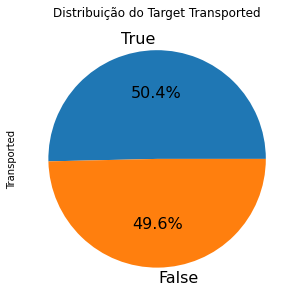

In [ ]:
# Análise da Distribuição das classes
plt.figure(figsize=(5,5))

df['Transported'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuição do Target Transported")

Como foi dito no texto do problema, aproximadamente a metade dos passageiros foram transportados para outra dimensão, como podemos ver no gráfico acima.

In [ ]:
#Correlação das variáveis com a classe target
df.corrwith(df["Transported"]).sort_values(ascending = False).round(3)

Transported     1.000
FoodCourt       0.047
ShoppingMall    0.010
Age            -0.075
VRDeck         -0.207
Spa            -0.221
RoomService    -0.245
dtype: float64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

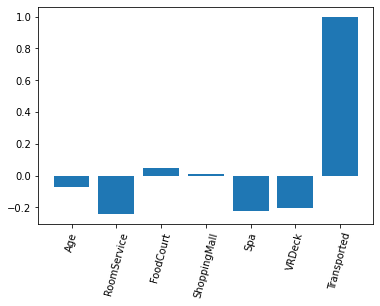

In [ ]:
plt.bar(dict(df.corrwith(df["Transported"])).keys(), dict(df.corrwith(df["Transported"])).values())
plt.xticks(rotation=75)

A correlação inicial das variaveis está bem pequena com o target.

In [ ]:
#Cálculo da quantidade de dados nulos por coluna

print('Valores Faltantes:')
print('')
print(df.isna().sum().sort_values(ascending = False))
print('')

Valores Faltantes:

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64



Podemos perceber que apenas as colunas contendo o ID dos passageiros e a informação se foi ou não transportada não contem dados nulos. 

#Análise dos dados faltantes

Considerações:

1. CryoSleep, VIP, Destination e Home Planet: Preencher com o valor mais frequente
2. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Preencher com 0 os valores em branco
3. Name e Cabin: Analisar melhor forma de preenchimento
4. Age: Preencher com a média ou mediana considerando o home Planet dos passageiros


In [ ]:
# Divisão da coluna PassengerID considerando os primeiros numeros como o grupo e os ultimos como ordinais

df[['Passenger_Group','Passenger_Num']] = df['PassengerId'].str.split('_',expand = True)
df = df.drop('PassengerId',axis=1)

df_t[['Passenger_Group','Passenger_Num']] = df_t['PassengerId'].str.split('_',expand = True)
df_t = df_t.drop('PassengerId',axis=1)

df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_Group,Passenger_Num
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [ ]:
# Divisão da coluna Name nas colunas Name e LastName

df[['FirstName','LastName']] = df['Name'].str.split(' ',expand = True)
df = df.drop('Name',axis=1)
df = df.drop('FirstName',axis=1)

df_t[['FirstName','LastName']] = df_t['Name'].str.split(' ',expand = True)

# Excluindo coluna original e coluna do primeiro nome

df_t = df_t.drop('Name',axis=1)
df_t = df_t.drop('FirstName',axis=1)

df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,Passenger_Num,LastName
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,01,Noxnuther
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,01,Mondalley
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,01,Connon
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,01,Hontichre


## Substituição dos valores nulos por zero

In [ ]:
df['RoomService'].fillna(0,inplace = True)
df['ShoppingMall'].fillna(0,inplace = True)
df['VRDeck'].fillna(0,inplace = True)
df['FoodCourt'].fillna(0,inplace = True)
df['Spa'].fillna(0,inplace = True)

df_t['RoomService'].fillna(0,inplace = True)
df_t['ShoppingMall'].fillna(0,inplace = True)
df_t['VRDeck'].fillna(0,inplace = True)
df_t['FoodCourt'].fillna(0,inplace = True)
df_t['Spa'].fillna(0,inplace = True)

In [ ]:
(df.isnull().sum()[df.isnull().sum() != 0]).sort_values(ascending = False).round(1)

CryoSleep      217
VIP            203
HomePlanet     201
LastName       200
Cabin          199
Destination    182
Age            179
dtype: int64

## Subsituição dos valores nulos pelos valores mais frequentes

In [ ]:
# Analisando qual o valor mais frequente dos dados de treinamento

print(blue('Dados de Treinamento','bold'))
print('')
print(black('CryoSleep|Qtd Valores','bold'))
print(df['CryoSleep'].value_counts())
print('')
print(black('VIP|Qtd Valores','bold'))
print(df['VIP'].value_counts())
print('')
print(black('HomePlanet|Qtd Valores','bold'))
print(df['HomePlanet'].value_counts())
print('')
print(black('Destination|Qtd Valores','bold'))
print(df['Destination'].value_counts())
print('')

Dados de Treinamento

CryoSleep|Qtd Valores
False    5439
True     3037
Name: CryoSleep, dtype: int64

VIP|Qtd Valores
False    8291
True      199
Name: VIP, dtype: int64

HomePlanet|Qtd Valores
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Destination|Qtd Valores
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64



In [ ]:
# Analisando qual o valor mais frequente dos dados de teste

print(blue('Dados de Teste','bold'))
print('')
print(black('CryoSleep|Qtd Valores','bold'))
print(df_t['CryoSleep'].value_counts())
print('')
print(black('VIP|Qtd Valores','bold'))
print(df_t['VIP'].value_counts())
print('')
print(black('HomePlanet|Qtd Valores','bold'))
print(df_t['HomePlanet'].value_counts())
print('')
print(black('Destination|Qtd Valores','bold'))
print(df_t['Destination'].value_counts())
print('')

Dados de Teste

CryoSleep|Qtd Valores
False    2640
True     1544
Name: CryoSleep, dtype: int64

VIP|Qtd Valores
False    4110
True       74
Name: VIP, dtype: int64

HomePlanet|Qtd Valores
Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

Destination|Qtd Valores
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64



In [ ]:
#Substituição dos valores

#Dataframe de treinamento

most_frequent = df['HomePlanet'].value_counts().index[0]
def replace(row):
    if pd.isna(row['HomePlanet']):
        return most_frequent
    else:
        return row['HomePlanet']
    
df['HomePlanet'] = df.apply(replace, axis=1)

#Dataframe de teste

most_frequent_t = df_t['HomePlanet'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['HomePlanet']):
        return most_frequent_t
    else:
        return row['HomePlanet']
    
df_t['HomePlanet'] = df_t.apply(replace_t, axis=1)

In [ ]:
#Substituição dos valores

#Dataframe de treinamento

most_frequent = df['Destination'].value_counts().index[0]
def replace(row):
    if pd.isna(row['Destination']):
        return most_frequent
    else:
        return row['Destination']
    
df['Destination'] = df.apply(replace, axis=1)

#Dataframe de teste

most_frequent_t = df_t['Destination'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['Destination']):
        return most_frequent_t
    else:
        return row['Destination']
    
df_t['Destination'] = df_t.apply(replace_t, axis=1)

In [ ]:
#Substituição dos valores

#Dataframe de treinamento

most_frequent = df['CryoSleep'].value_counts().index[0]
def replace(row):
    if pd.isna(row['CryoSleep']):
        return most_frequent
    else:
        return row['CryoSleep']
    
df['CryoSleep'] = df.apply(replace, axis=1)

#Dataframe de teste

most_frequent_t = df_t['CryoSleep'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['CryoSleep']):
        return most_frequent_t
    else:
        return row['CryoSleep']
    
df_t['CryoSleep'] = df_t.apply(replace_t, axis=1)

In [ ]:
#Substituição dos valores

#Dataframe de treinamento

most_frequent = df['VIP'].value_counts().index[0]
def replace(row):
    if pd.isna(row['VIP']):
        return most_frequent
    else:
        return row['VIP']
    
df['VIP'] = df.apply(replace, axis=1)

#Dataframe de teste

most_frequent_t = df_t['VIP'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['VIP']):
        return most_frequent_t
    else:
        return row['VIP']
    
df_t['VIP'] = df_t.apply(replace_t, axis=1)

In [ ]:
(df.isnull().sum()[df.isnull().sum() != 0]).sort_values(ascending = False).round(1)

LastName    200
Cabin       199
Age         179
dtype: int64

In [ ]:
# Verificando mudanças

print(blue('Dados de Treinamento','bold'))
print('')
print(black('CryoSleep|Qtd Valores','bold'))
print(df['CryoSleep'].value_counts())
print('')
print(black('VIP|Qtd Valores','bold'))
print(df['VIP'].value_counts())
print('')
print(black('HomePlanet|Qtd Valores','bold'))
print(df['HomePlanet'].value_counts())
print('')
print(black('Destination|Qtd Valores','bold'))
print(df['Destination'].value_counts())
print('')

Dados de Treinamento

CryoSleep|Qtd Valores
False    5656
True     3037
Name: CryoSleep, dtype: int64

VIP|Qtd Valores
False    8494
True      199
Name: VIP, dtype: int64

HomePlanet|Qtd Valores
Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Destination|Qtd Valores
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64



In [ ]:
# Verificando mudanças

print(blue('Dados de Teste','bold'))
print('')
print(black('CryoSleep|Qtd Valores','bold'))
print(df_t['CryoSleep'].value_counts())
print('')
print(black('VIP|Qtd Valores','bold'))
print(df_t['VIP'].value_counts())
print('')
print(black('HomePlanet|Qtd Valores','bold'))
print(df_t['HomePlanet'].value_counts())
print('')
print(black('Destination|Qtd Valores','bold'))
print(df_t['Destination'].value_counts())
print('')

Dados de Teste

CryoSleep|Qtd Valores
False    2733
True     1544
Name: CryoSleep, dtype: int64

VIP|Qtd Valores
False    4203
True       74
Name: VIP, dtype: int64

HomePlanet|Qtd Valores
Earth     2350
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

Destination|Qtd Valores
TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64



## Substituição dos valores nulos pela mediana

In [ ]:
# Verificando melhores possibilidades para subtituir faltantes em Age

print(black('Média:','bold'))
print(df.groupby(['HomePlanet'])['Age'].mean())
print('')
print(black('Mediana','bold'))
print(df.groupby(['HomePlanet'])['Age'].median())

Média:
HomePlanet
Earth     26.183323
Europa    34.419664
Mars      29.297203
Name: Age, dtype: float64

Mediana
HomePlanet
Earth     24.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64


Os valores da média e da mediana estão bem próximos, então foi escolhido substituir os valores nulos pela mediana

In [ ]:
# Ajustando os dados faltantes de Age pela mediana

# Dados de treinamento

df_ages = df.groupby(['HomePlanet'])['Age'].median()

def replace(row):
    if pd.isnull(row['Age']):
        return df_ages[row['HomePlanet']]
    else:
        return row['Age']
    
df['Age'] = df.apply(replace, axis=1)

# Dados de teste

df_ages_t = df_t.groupby(['HomePlanet'])['Age'].median()

def replace_t(row):
    if pd.isnull(row['Age']):
        return df_ages_t[row['HomePlanet']]
    else:
        return row['Age']
    
df_t['Age'] = df_t.apply(replace_t, axis=1)

In [ ]:
(df.isnull().sum()[df.isnull().sum() != 0]).sort_values(ascending = False).round(1)

LastName    200
Cabin       199
dtype: int64

In [ ]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,Passenger_Num,LastName
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,Santantines


## Substituição de valores nulos

In [ ]:
# Análise dos valores da coluna Cabin
df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Os valores estão muito pequenos para cada cabine. Como o código da cabine se compões por 3 categorias, foi decidido dividi-la em 3 colunas distintas.

In [ ]:
# Cabin - Numero da cabine do passageiro. Indica area/num/lado. Lado pode ser P de bombordo ou S para estibordo

# Separando cabine em 3 colunas: deck, numero e lado

df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Lado']] = df['Cabin'].str.split('/',expand = True)

#Excluindo coluna original
df = df.drop('Cabin',axis=1)

df_t[['Cabin_Deck', 'Cabin_Num', 'Cabin_Lado']] = df_t['Cabin'].str.split('/',expand = True)
df_t = df_t.drop('Cabin',axis=1)

df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,Passenger_Num,LastName,Cabin_Deck,Cabin_Num,Cabin_Lado
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Ofracculy,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Vines,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Susent,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,Susent,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,01,Noxnuther,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,01,Mondalley,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,01,Connon,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,01,Hontichre,E,608,S


In [ ]:
# Análise dos dados da coluna Deck

print(black('Deck|Qtd Valores','bold'))
print(df['Cabin_Deck'].value_counts())

Deck|Qtd Valores
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Deck, dtype: int64


Os valores atribuidos aos decks são altos, então vamos substituir os valores nulos pelo mais frequente.

In [ ]:
# Substituição pelo valor mais frequente

# Dados de treinamento
most_frequent = df['Cabin_Deck'].value_counts().index[0]
def replace(row):
    if pd.isna(row['Cabin_Deck']):
        return most_frequent
    else:
        return row['Cabin_Deck']
    
df['Cabin_Deck'] = df.apply(replace, axis=1)

# Dados de Teste
most_frequent_t = df_t['Cabin_Deck'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['Cabin_Deck']):
        return most_frequent_t
    else:
        return row['Cabin_Deck']
    
df_t['Cabin_Deck'] = df_t.apply(replace, axis=1)

In [ ]:
# Análise dos dados da coluna Deck

print(black('Num|Qtd Valores','bold'))
df['Cabin_Num'].value_counts()

Num|Qtd Valores


82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_Num, Length: 1817, dtype: int64

Os valores atribuidos aos numeros das cabines são pequenos em comparação aos 200 valores nulos que precisamos preencher. Foi decidido distribuir os 200 numeros mais frequentes nos valores nulos para não sobrecarregar apenas um valor.

In [ ]:
# Lista dos valores mais frequentes

blank = np.arange(0,df['Cabin_Num'].isna().sum())
list_most_frequent = []

for i in blank:
  most_frequent1 = df['Cabin_Num'].value_counts().index[i]
  list_most_frequent.append(most_frequent1)

print(list_most_frequent)

['82', '86', '19', '56', '176', '97', '230', '269', '65', '123', '109', '0', '91', '18', '103', '118', '144', '150', '186', '35', '95', '75', '125', '137', '59', '53', '50', '44', '42', '227', '27', '16', '60', '178', '151', '21', '166', '24', '9', '247', '57', '13', '183', '14', '23', '83', '3', '96', '158', '187', '11', '133', '175', '201', '22', '72', '1', '20', '229', '226', '238', '225', '283', '43', '281', '68', '124', '120', '25', '63', '279', '145', '142', '270', '140', '260', '185', '194', '80', '121', '94', '107', '117', '291', '55', '38', '47', '46', '62', '258', '78', '189', '37', '222', '152', '199', '129', '218', '246', '450', '259', '5', '1476', '216', '237', '54', '8', '156', '105', '92', '99', '102', '89', '67', '81', '127', '32', '255', '190', '233', '6', '262', '163', '149', '171', '265', '122', '193', '58', '253', '195', '330', '1411', '217', '525', '29', '1046', '48', '981', '51', '61', '206', '74', '213', '66', '211', '85', '250', '115', '198', '100', '101', '10',

In [ ]:
# Transformação da coluna em lista para a substituição ser possível

list_cabin_num = df['Cabin_Num'].tolist()

print(list_cabin_num)

['0', '0', '0', '0', '1', '0', '2', '0', '3', '1', '1', '1', '1', '1', '2', nan, '3', '4', '5', '0', '6', '0', '0', '0', '0', '0', '0', '0', '2', '6', '0', '8', '4', '9', '9', '9', '1', '1', '8', '10', '1', '2', '3', '3', '3', '3', '10', '10', '1', '2', '6', '11', '1', '1', '1', '7', '12', '13', '14', '3', '6', '10', '10', '15', '4', '16', '13', '14', '17', '3', '3', '18', '15', '4', '13', '16', '16', '16', '14', '5', '17', '5', '15', '16', '20', '9', '9', '9', '2', '11', '11', '19', '12', nan, '23', '24', '18', '18', '21', '2', '19', '19', '19', nan, '5', '5', '5', '6', '1', '23', '20', '24', '4', '0', '0', '25', '21', '27', '27', '7', '3', '8', '22', '29', '5', '17', '23', '18', '5', '6', '19', '29', '30', '31', '25', '26', '31', '27', '20', '32', '22', '8', '8', '28', '28', '37', '35', '35', '23', '10', '30', '24', '11', '38', '2', '6', '26', '26', '26', '27', '3', '36', '28', '31', '8', '32', '29', '29', '29', '41', '41', '41', '42', '5', '5', '30', '33', '31', '3', '3', '9', '2', 

In [ ]:
# Lista dos indices da lista da cabine

lista = np.arange(0,len(list_cabin_num)-1)

print(lista)

[   0    1    2 ... 8689 8690 8691]


In [ ]:
# Substituição dos valores nulos

for i in lista:
  if pd.isnull(list_cabin_num[i]):
    list_cabin_num.pop(i)
    list_cabin_num.insert(i,list_most_frequent[0])
    list_most_frequent.pop(0)
  else:
    i=i+1

print(list_cabin_num)

['0', '0', '0', '0', '1', '0', '2', '0', '3', '1', '1', '1', '1', '1', '2', '82', '3', '4', '5', '0', '6', '0', '0', '0', '0', '0', '0', '0', '2', '6', '0', '8', '4', '9', '9', '9', '1', '1', '8', '10', '1', '2', '3', '3', '3', '3', '10', '10', '1', '2', '6', '11', '1', '1', '1', '7', '12', '13', '14', '3', '6', '10', '10', '15', '4', '16', '13', '14', '17', '3', '3', '18', '15', '4', '13', '16', '16', '16', '14', '5', '17', '5', '15', '16', '20', '9', '9', '9', '2', '11', '11', '19', '12', '86', '23', '24', '18', '18', '21', '2', '19', '19', '19', '19', '5', '5', '5', '6', '1', '23', '20', '24', '4', '0', '0', '25', '21', '27', '27', '7', '3', '8', '22', '29', '5', '17', '23', '18', '5', '6', '19', '29', '30', '31', '25', '26', '31', '27', '20', '32', '22', '8', '8', '28', '28', '37', '35', '35', '23', '10', '30', '24', '11', '38', '2', '6', '26', '26', '26', '27', '3', '36', '28', '31', '8', '32', '29', '29', '29', '41', '41', '41', '42', '5', '5', '30', '33', '31', '3', '3', '9', '2

In [ ]:
# Substituição da coluna no dataframe pela lista sem valores nulos

df['Cabin_Num'] = list_cabin_num

df['Cabin_Num']

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin_Num, Length: 8693, dtype: object

In [ ]:
# Substituição no DF de teste

blank_t = np.arange(0,df_t['Cabin_Num'].isna().sum())
list_most_frequent_t = []

for i in blank_t:
  most_frequent1_t = df_t['Cabin_Num'].value_counts().index[i]
  list_most_frequent_t.append(most_frequent1_t)

list_cabin_num_t = df_t['Cabin_Num'].tolist()

lista_t = np.arange(0,len(list_cabin_num_t)-1)

for i in lista_t:
  if pd.isnull(list_cabin_num_t[i]):
    list_cabin_num_t.pop(i)
    list_cabin_num_t.insert(i,list_most_frequent_t[0])
    list_most_frequent_t.pop(0)
  else:
    i=i+1

df_t['Cabin_Num'] = list_cabin_num_t

In [ ]:
(df.isnull().sum()[df.isnull().sum() != 0]).sort_values(ascending = False).round(1)

LastName      200
Cabin_Lado    199
dtype: int64

In [ ]:
# Análise dos dados da coluna do lado da cabine

df['Cabin_Lado'].value_counts()

S    4288
P    4206
Name: Cabin_Lado, dtype: int64

Como temos apenas dois valores com quantidades altas de valores atribuidos, foi decidido substituir os valores nulos pelo numero mais frequente

In [ ]:
# Substituição dos valores

most_frequent = df['Cabin_Lado'].value_counts().index[0]
def replace(row):
    if pd.isna(row['Cabin_Lado']):
        return most_frequent
    else:
        return row['Cabin_Lado']
    
df['Cabin_Lado'] = df.apply(replace, axis=1)

In [ ]:
# Substituição no DF de teste

most_frequent_t = df_t['Cabin_Lado'].value_counts().index[0]
def replace_t(row):
    if pd.isna(row['Cabin_Lado']):
        return most_frequent_t
    else:
        return row['Cabin_Lado']
    
df_t['Cabin_Lado'] = df_t.apply(replace_t, axis=1)

In [ ]:
# Análise da coluna LastName
df['LastName'].value_counts()

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: LastName, Length: 2217, dtype: int64

Como a quantidade de valores atribuidos a cada sobrenome é pequena, vamos implementar a mesma tratativa realizada na coluna do numero da cabine.

In [ ]:
# Substituição no DF de treinamento

blank2 = np.arange(0,df['LastName'].isna().sum())
list_most_frequent2 = []

for i in blank2:
  most_frequent2 = df['LastName'].value_counts().index[i]
  list_most_frequent2.append(most_frequent2)

list_last_name = df['LastName'].tolist()

lista2 = np.arange(0,len(list_last_name)-1)

for i in lista2:
  if pd.isnull(list_last_name[i]):
    list_last_name.pop(i)
    list_last_name.insert(i,list_most_frequent2[0])
    list_most_frequent2.pop(0)
  else:
    i=i+1

df['LastName'] = list_last_name

df['LastName'].value_counts()

Casonston     19
Oneiles       17
Litthews      16
Domington     16
Fulloydez     15
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: LastName, Length: 2217, dtype: int64

In [ ]:
# Substituição no DF de teste

blank2_t = np.arange(0,df_t['LastName'].isna().sum())
list_most_frequent2_t = []

for i in blank2_t:
  most_frequent2_t = df_t['LastName'].value_counts().index[i]
  list_most_frequent2_t.append(most_frequent2_t)

list_last_name_t = df_t['LastName'].tolist()

lista2_t = np.arange(0,len(list_last_name_t)-1)

for i in lista2_t:
  if pd.isnull(list_last_name_t[i]):
    list_last_name_t.pop(i)
    list_last_name_t.insert(i,list_most_frequent2_t[0])
    list_most_frequent2_t.pop(0)
  else:
    i=i+1

df_t['LastName'] = list_last_name_t

df_t['LastName'].value_counts()

Extraly       15
Hopperett     14
Tranklinay    12
Garrez        11
Dickley       11
              ..
Bootez         1
Covetive       1
Gread          1
Burryerson     1
Cure           1
Name: LastName, Length: 1725, dtype: int64

In [ ]:
(df.isnull().sum()[df.isnull().sum() != 0]).sort_values(ascending = False).round(1)

Series([], dtype: int64)

Não temos mais nenhuma coluna com dados nulo.

# Análise dos dados

In [ ]:
# Análise da correlação das variaveis com o target após o tratamento dos dados nulos
df.corrwith(df["Transported"]).sort_values(ascending = False).round(3)

Transported     1.000
CryoSleep       0.460
FoodCourt       0.046
ShoppingMall    0.009
VIP            -0.037
Age            -0.073
VRDeck         -0.205
Spa            -0.219
RoomService    -0.241
dtype: float64

Podemos perceber que a coluna CryoSleep aparentemente influencia mais na coluna Transported (target) do que as outras variáveis consideradas.

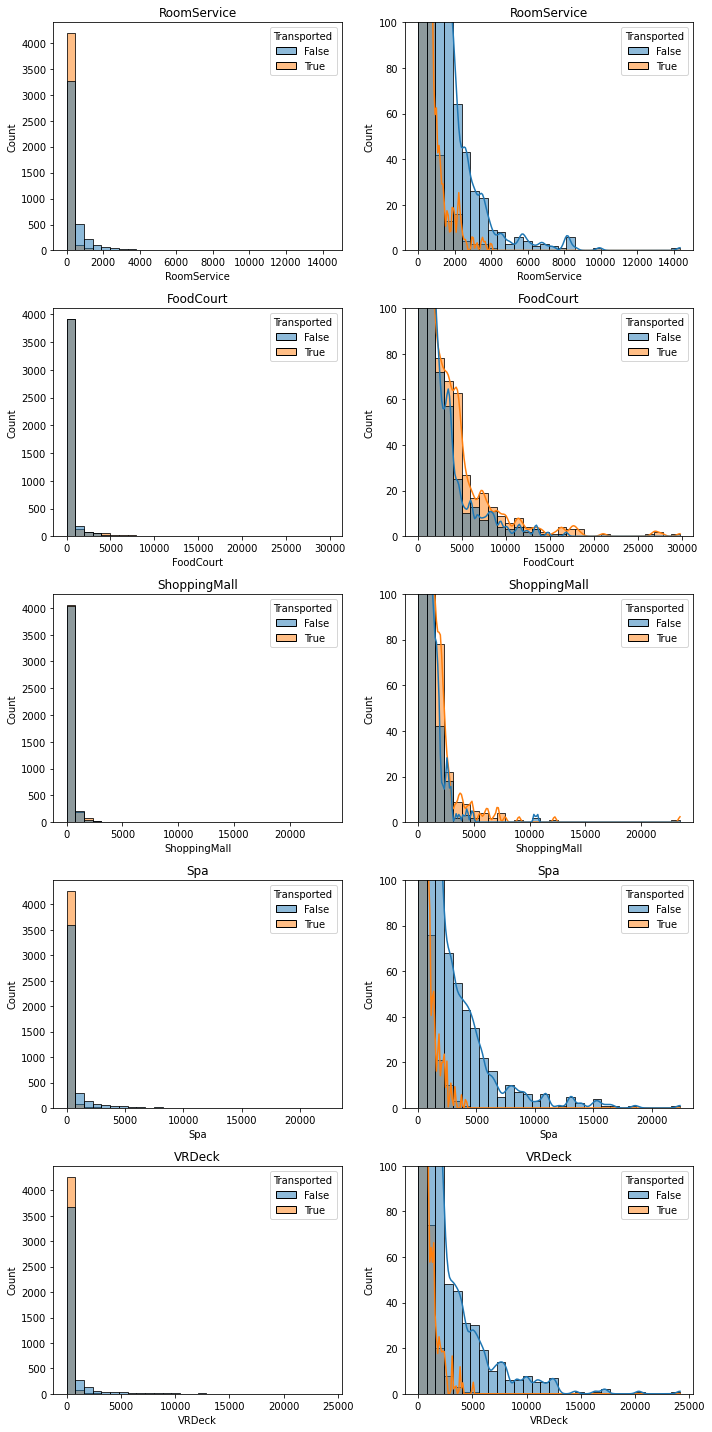

In [ ]:
# Análise das colunas relacionadas a despesas

exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
        
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

Nos gráficos da esquerda podemos perceber que há um grande numero de passageiros que não gastaram dinheiro durante a viagem e a maioria gastou bem pouco.
Olhando mais de perto (gráficos a direita) percebemos que algumas variações dos passageiros transportados ou não de acordo com o tipo de gasto.

Text(0.5, 0, 'Idade (anos))')

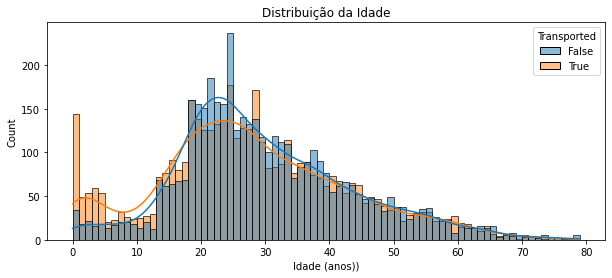

In [ ]:
# Análise da coluna relacionada a idade dos passageiros

plt.figure(figsize=(10,4))

sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos))')

Podemos observar que até ~18 anos tiveram mais passageiros transportados; entre ~18 e ~40 a maioria não foi transportada e para idades maiores, a distribuição fica muito parecida para os que foram ou não transportados.

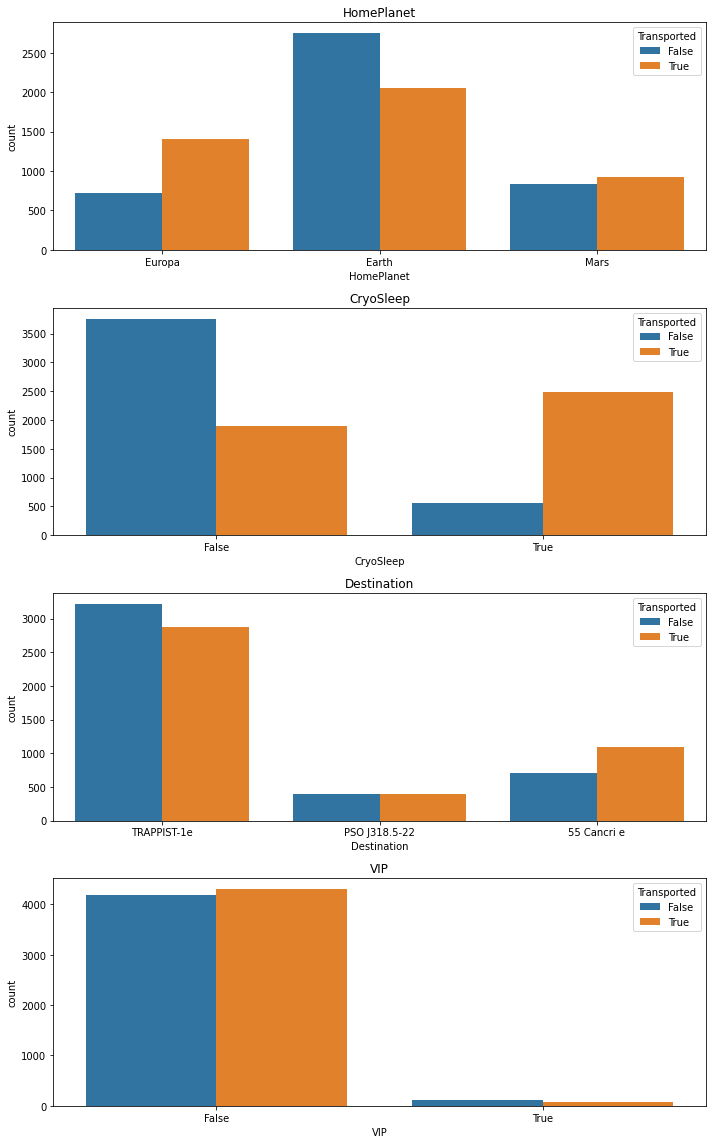

In [ ]:
# Análise das colunas relacionadas a categorias

cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Conseguimos perceber que as distribuições estão bem variadas de acordo com a variavel considerada.

# Machine Learning

## Pré-processamento

In [ ]:
#print(df['Cabin_Deck'].unique())

#Convertendo valores categoricos em numericos
#One Hot Encoding - coluna 'Cabin_Deck'
df2=pd.get_dummies(df[['Cabin_Deck']])
df=pd.concat([df,df2],axis=1)
df = df.drop('Cabin_Deck',axis=1)


df2_t=pd.get_dummies(df_t[['Cabin_Deck']])
df_t=pd.concat([df_t,df2_t],axis=1)
df_t = df_t.drop('Cabin_Deck',axis=1)

df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Lado,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,P,0,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,S,0,0,0,0,0,1,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,S,1,0,0,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,S,1,0,0,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,S,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,98,P,1,0,0,0,0,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,1499,S,0,0,0,0,0,0,1,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,1500,S,0,0,0,0,0,0,1,0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,608,S,0,0,0,0,1,0,0,0


In [ ]:
#print(df['Cabin_Lado'].unique())

#Convertendo valores categoricos em numericos
#One Hot Encoding - coluna 'Cabin_Lado'
df2=pd.get_dummies(df[['Cabin_Lado']])
df=pd.concat([df,df2],axis=1)
df = df.drop('Cabin_Lado',axis=1)

df2_t=pd.get_dummies(df_t[['Cabin_Lado']])
df_t=pd.concat([df_t,df2_t],axis=1)
df_t = df_t.drop('Cabin_Lado',axis=1)

df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,1,0,0,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,0,0,0,0,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,0,0,0,0,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,1,0,0,0,0,0,0,0,1,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,0,0,0,0,1,0,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59317ddf10>]],
      dtype=object)

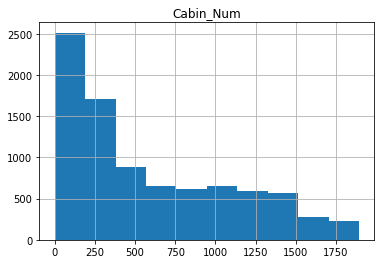

In [ ]:
#Analisando distribuição de quantidade de pessoas por numeração de cabines
df['Cabin_Num'] = pd.to_numeric(df['Cabin_Num'], errors='coerce').astype('Int64')
df_t['Cabin_Num'] = pd.to_numeric(df_t['Cabin_Num'], errors='coerce').astype('Int64')

df.hist(column='Cabin_Num')

In [ ]:
#Normalizando coluna Cabin_Num
df['Cabin_Num'] = (df['Cabin_Num'] - df['Cabin_Num'].min()) / (df['Cabin_Num'].max() - df['Cabin_Num'].min())

df_t['Cabin_Num'] = (df_t['Cabin_Num'] - df_t['Cabin_Num'].min()) / (df_t['Cabin_Num'].max() - df_t['Cabin_Num'].min())

df['Cabin_Num']

0            0.0
1            0.0
2            0.0
3            0.0
4       0.000528
          ...   
8688    0.051742
8689    0.791447
8690    0.791975
8691    0.321014
8692    0.321014
Name: Cabin_Num, Length: 8693, dtype: Float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59318ee1d0>]],
      dtype=object)

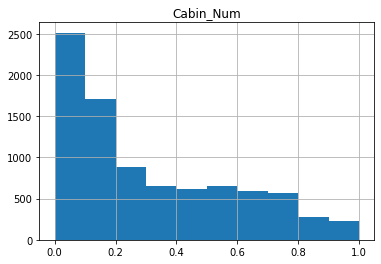

In [ ]:
df.hist(column='Cabin_Num')

In [ ]:
#print(df['HomePlanet'].unique())

#Convertendo valores categoricos em numericos
#One Hot Encoding - coluna 'HomePlanet'
df2=pd.get_dummies(df[['HomePlanet']])
df=pd.concat([df,df2],axis=1)
df = df.drop('HomePlanet',axis=1)

df2_t=pd.get_dummies(df_t[['HomePlanet']])
df_t=pd.concat([df_t,df2_t],axis=1)
df_t = df_t.drop('HomePlanet',axis=1)

df

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,0,1,0,0,1,0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,1,0,0,0,1,1,0,0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,0,0,1,0,1,0
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,0,0,1,0,1,0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,0,0,0,0,0,1,0,0,1,0
8689,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,1,0,0,1,1,0,0
8690,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,0,0,1,0,0,1,1,0,0
8691,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
#print(df['CryoSleep'].unique())

#Convertendo valores booleanos em numericos
df['CryoSleep'] = df['CryoSleep'].astype(int)

df_t['CryoSleep'] = df_t['CryoSleep'].astype(int)

df

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,0,1,0,0,1,0
1,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,1,0,0,0,1,1,0,0
2,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,0,0,1,0,1,0
3,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,0,0,1,0,1,0
4,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,0,0,0,0,0,1,0,0,1,0
8689,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,1,0,0,1,1,0,0
8690,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,0,0,1,0,0,1,1,0,0
8691,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
#print(df['HomePlanet'].unique())

#Convertendo valores categoricos em numericos
#One Hot Encoding - coluna 'Destination'
df2=pd.get_dummies(df[['Destination']])
df=pd.concat([df,df2],axis=1)
df = df.drop('Destination',axis=1)

df2_t=pd.get_dummies(df_t[['Destination']])
df_t=pd.concat([df_t,df2_t],axis=1)
df_t = df_t.drop('Destination',axis=1)

df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,...,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,...,0,0,1,0,0,1,0,0,0,1
1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,...,0,0,0,1,1,0,0,0,0,1
2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,...,0,0,0,1,0,1,0,0,0,1
3,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,...,0,0,0,1,0,1,0,0,0,1
4,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,...,0,0,1,0,0,1,0,1,0,0
8689,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,...,1,0,0,1,1,0,0,0,1,0
8690,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,...,1,0,0,1,1,0,0,0,0,1
8691,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,...,0,0,0,1,0,1,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5935d27f50>]],
      dtype=object)

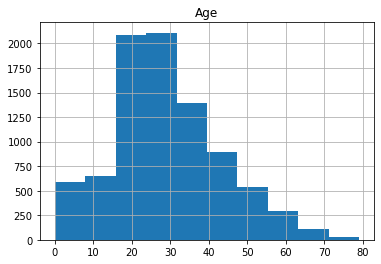

In [ ]:
#Analisando distribuição de quantidade de pessoas por idade
df.hist(column='Age')

In [ ]:
#Normalizando coluna Age
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

df_t['Age'] = (df_t['Age'] - df_t['Age'].min()) / (df_t['Age'].max() - df_t['Age'].min())

df['Age']

0       0.493671
1       0.303797
2       0.734177
3       0.417722
4       0.202532
          ...   
8688    0.518987
8689    0.227848
8690    0.329114
8691    0.405063
8692    0.556962
Name: Age, Length: 8693, dtype: float64

In [ ]:
#print(df['VIP'].unique())

#Convertendo valores booleanos em numericos
df['VIP'] = df['VIP'].astype(int)

df_t['VIP'] = df_t['VIP'].astype(int)

df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,...,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.493671,0,0.0,0.0,0.0,0.0,0.0,False,0001,...,0,0,1,0,0,1,0,0,0,1
1,0,0.303797,0,109.0,9.0,25.0,549.0,44.0,True,0002,...,0,0,0,1,1,0,0,0,0,1
2,0,0.734177,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,...,0,0,0,1,0,1,0,0,0,1
3,0,0.417722,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,...,0,0,0,1,0,1,0,0,0,1
4,0,0.202532,0,303.0,70.0,151.0,565.0,2.0,True,0004,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.518987,1,0.0,6819.0,0.0,1643.0,74.0,False,9276,...,0,0,1,0,0,1,0,1,0,0
8689,1,0.227848,0,0.0,0.0,0.0,0.0,0.0,False,9278,...,1,0,0,1,1,0,0,0,1,0
8690,0,0.329114,0,0.0,0.0,1872.0,1.0,0.0,True,9279,...,1,0,0,1,1,0,0,0,0,1
8691,0,0.405063,0,0.0,1049.0,0.0,353.0,3235.0,False,9280,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
max = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].max(axis=1).max(axis=0)
min = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].min(axis=1).min(axis=0)

#Normalizando colunas de gastos monetários, mantendo a proporção entre elas
df['RoomService'] = (df['RoomService'] - min) / (max - min)
df['FoodCourt'] = (df['FoodCourt'] - min) / (max - min)
df['ShoppingMall'] = (df['ShoppingMall'] - min) / (max - min)
df['Spa'] = (df['Spa'] - min) / (max - min)
df['VRDeck'] = (df['VRDeck'] - min) / (max - min)
#df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

max_t = df_t[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].max(axis=1).max(axis=0)
min_t = df_t[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].min(axis=1).min(axis=0)

df_t['RoomService'] = (df_t['RoomService'] - min_t) / (max_t - min_t)
df_t['FoodCourt'] = (df_t['FoodCourt'] - min_t) / (max_t - min_t)
df_t['ShoppingMall'] = (df_t['ShoppingMall'] - min_t) / (max_t - min_t)
df_t['Spa'] = (df_t['Spa'] - min_t) / (max_t - min_t)
df_t['VRDeck'] = (df_t['VRDeck'] - min_t) / (max_t - min_t)
#df_t[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,...,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0001,...,0,0,1,0,0,1,0,0,0,1
1,0,0.303797,0,0.003656,0.000302,0.000839,0.018415,0.001476,True,0002,...,0,0,0,1,1,0,0,0,0,1
2,0,0.734177,1,0.001442,0.119948,0.000000,0.225237,0.001644,False,0003,...,0,0,0,1,0,1,0,0,0,1
3,0,0.417722,0,0.000000,0.043035,0.012444,0.111663,0.006474,False,0003,...,0,0,0,1,0,1,0,0,0,1
4,0,0.202532,0,0.010163,0.002348,0.005065,0.018951,0.000067,True,0004,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.518987,1,0.000000,0.228726,0.000000,0.055110,0.002482,False,9276,...,0,0,1,0,0,1,0,1,0,0
8689,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,9278,...,1,0,0,1,1,0,0,0,1,0
8690,0,0.329114,0,0.000000,0.000000,0.062791,0.000034,0.000000,True,9279,...,1,0,0,1,1,0,0,0,0,1
8691,0,0.405063,0,0.000000,0.035186,0.000000,0.011840,0.108510,False,9280,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
#Convertendo valores texto em numericos
#coluna 'LastName'
df['LastName'] = pd.factorize(df['LastName'])[0]
#normalizando
df['LastName'] = (df['LastName'] - df['LastName'].min()) / (df['LastName'].max() - df['LastName'].min())

df_t['LastName'] = pd.factorize(df_t['LastName'])[0]
df_t['LastName'] = (df_t['LastName'] - df_t['LastName'].min()) / (df_t['LastName'].max() - df_t['LastName'].min())

df['LastName']

0       0.000000
1       0.000451
2       0.000903
3       0.000903
4       0.001354
          ...   
8688    0.616426
8689    0.962545
8690    0.104242
8691    0.175090
8692    0.175090
Name: LastName, Length: 8693, dtype: float64

In [ ]:
#normalizando coluna 'Passenger_Group'
df['Passenger_Group'] = pd.to_numeric(df['Passenger_Group'], errors='coerce').astype('Int64')
df['Passenger_Group'] = (df['Passenger_Group'] - df['Passenger_Group'].min()) / (df['Passenger_Group'].max() - df['Passenger_Group'].min())

df_t['Passenger_Group'] = pd.to_numeric(df_t['Passenger_Group'], errors='coerce').astype('Int64')
df_t['Passenger_Group'] = (df_t['Passenger_Group'] - df_t['Passenger_Group'].min()) / (df_t['Passenger_Group'].max() - df_t['Passenger_Group'].min())

df['Passenger_Group']

0            0.0
1       0.000108
2       0.000216
3       0.000216
4       0.000323
          ...   
8688    0.999569
8689    0.999784
8690    0.999892
8691         1.0
8692         1.0
Name: Passenger_Group, Length: 8693, dtype: Float64

In [ ]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_Group,...,Cabin_Deck_G,Cabin_Deck_T,Cabin_Lado_P,Cabin_Lado_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.0,...,0,0,1,0,0,1,0,0,0,1
1,0,0.303797,0,0.003656,0.000302,0.000839,0.018415,0.001476,True,0.000108,...,0,0,0,1,1,0,0,0,0,1
2,0,0.734177,1,0.001442,0.119948,0.000000,0.225237,0.001644,False,0.000216,...,0,0,0,1,0,1,0,0,0,1
3,0,0.417722,0,0.000000,0.043035,0.012444,0.111663,0.006474,False,0.000216,...,0,0,0,1,0,1,0,0,0,1
4,0,0.202532,0,0.010163,0.002348,0.005065,0.018951,0.000067,True,0.000323,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.518987,1,0.000000,0.228726,0.000000,0.055110,0.002482,False,0.999569,...,0,0,1,0,0,1,0,1,0,0
8689,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.999784,...,1,0,0,1,1,0,0,0,1,0
8690,0,0.329114,0,0.000000,0.000000,0.062791,0.000034,0.000000,True,0.999892,...,1,0,0,1,1,0,0,0,0,1
8691,0,0.405063,0,0.000000,0.035186,0.000000,0.011840,0.108510,False,1.0,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
#Separando coluna target(alvo) = 'Transported
X = df.drop(['Transported'],axis=1).values
y = df['Transported'].values.astype(int)

X_t = df_t.values
#Como se trata de uma competicao Kaggle, o dataset de teste não possui rótulo!! 

In [ ]:
# Separando o dataset de treino em treino e teste, já que o dataset de teste não possui rótulo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% treino e 30% teste

## Selecionando o modelo

Foram escolhidos o SVM e o Random Forest para serem comparados como modelo neste projeto

In [ ]:
#cálculo de acurácia, precisão e recall
from sklearn import metrics

In [ ]:
from sklearn import svm

print(black("SVM - Kernel linear",'bold'))
print('')

clf = svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

SVM - Kernel linear

Accuracy: 0.7553680981595092
Precision: 0.8223684210526315
Recall: 0.6608761329305136


In [ ]:
print(black("SVM - Kernel polinomial",'bold'))
print('')

clf = svm.SVC(kernel='poly') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

SVM - Kernel polinomial

Accuracy: 0.754217791411043
Precision: 0.8212605832549389
Recall: 0.6593655589123867


In [ ]:
print(black("SVM - Kernel RBF",'bold'))
print('')

clf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

SVM - Kernel RBF

Accuracy: 0.7350460122699386
Precision: 0.7988668555240793
Recall: 0.6389728096676737


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print(black("Random Forest",'bold'))
print('')

clf = RandomForestClassifier(n_estimators=10)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Random Forest

Accuracy: 0.7852760736196319
Precision: 0.825938566552901
Recall: 0.7311178247734139


Analisando a acurácia dos modelos testados, o modelo que apresentou o indice maior foi o Random Forest